In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Read book dataset.
books = pd.read_csv("book.csv")
books.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [3]:
books.shape

(2000, 11)

In [4]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [5]:
books.isna().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

##### Association Rule

In [6]:
#Libraries
from mlxtend.frequent_patterns import apriori, association_rules

import warnings
warnings.filterwarnings('ignore')

###### Rules with min_support >= 0.1

In [7]:
#Rules
score1 = apriori(books, min_support=0.1, use_colnames=True)
score1['Length'] = score1['itemsets'].apply(lambda x : len(x))
score1

,support,itemsets,Length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.1135,(ItalCook),1
8,0.1085,(Florence),1
9,0.1650,"(YouthBks, ChildBks)",2


In [8]:
# Slicing using support value and length.

#Rules with min_support >= 0.18 and length = 2
score1[(score1['support'] >= 0.18) & (score1['Length'] == 2)]

,support,itemsets,Length
10,0.2560,"(ChildBks, CookBks)",2
11,0.1840,"(DoItYBks, ChildBks)",2
14,0.1950,"(ChildBks, GeogBks)",2
19,0.1875,"(DoItYBks, CookBks)",2
22,0.1925,"(GeogBks, CookBks)",2


In [9]:
# Slicing using support value and length.

#Rules with min_support >= 0.12 and length = 3
score1[(score1['support'] >= 0.12) & (score1['Length'] == 3)]

,support,itemsets,Length
29,0.1290,"(YouthBks, ChildBks, CookBks)",3
30,0.1460,"(DoItYBks, ChildBks, CookBks)",3
31,0.1225,"(RefBks, ChildBks, CookBks)",3
32,0.1265,"(ChildBks, CookBks, ArtBks)",3
33,0.1495,"(ChildBks, GeogBks, CookBks)",3


In [10]:
#Model Building
model1 = association_rules(score1, metric='lift', min_threshold=1)
model1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
96,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
98,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237


In [11]:
#Slicing using support value and confidence value.

#Rules with support >= 0.15 and confidence >= 0.7
model1[(model1['support'] >= 0.15) & (model1['confidence'] >= 0.7)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
11,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
22,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556


In [12]:
#Slicing using support value and confidence value.

#Rules with support >= 0.2 and confidence >= 0.5
model1[(model1['support'] >= 0.2) & (model1['confidence'] >= 0.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


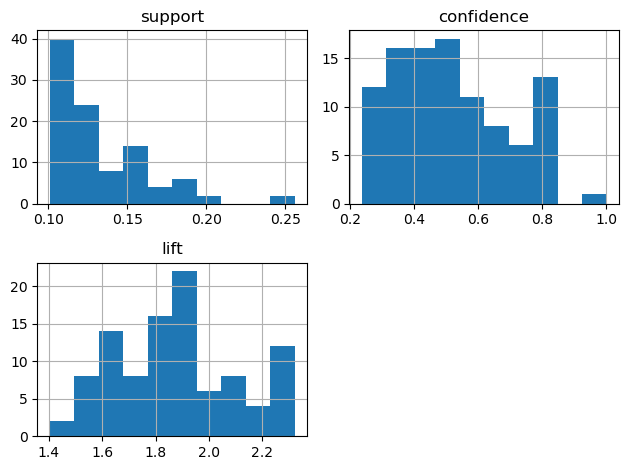

In [13]:
#Distribution of data.
model1[['support', 'confidence', 'lift']].hist()
plt.tight_layout()

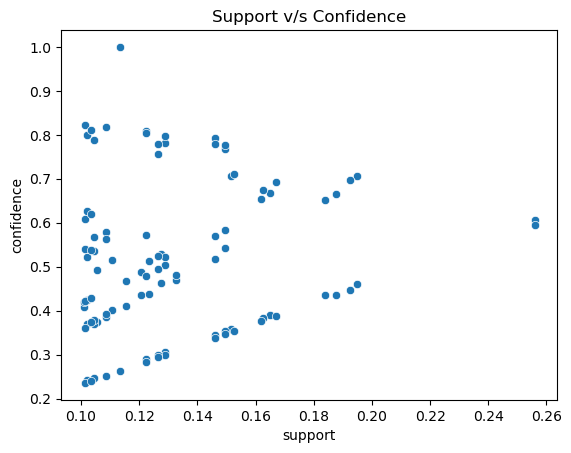

In [14]:
#Relationship between support and confidence
sns.scatterplot(model1['support'], model1['confidence']);
plt.title("Support v/s Confidence");

###### Rules with min_support >= 0.15

In [15]:
#Rules
score2 = apriori(books, min_support=0.15, use_colnames=True)
score2['Length'] = score2['itemsets'].apply(lambda x : len(x))
score2

,support,itemsets,Length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.1650,"(YouthBks, ChildBks)",2
8,0.2560,"(ChildBks, CookBks)",2
9,0.1840,"(DoItYBks, ChildBks)",2


In [16]:
# Slicing using support value and length.

#Rules with min_support >= 0.18 and length = 2
score2[(score2['support'] >= 0.18) & (score2['Length'] == 2)]

,support,itemsets,Length
8,0.2560,"(ChildBks, CookBks)",2
9,0.1840,"(DoItYBks, ChildBks)",2
12,0.1950,"(ChildBks, GeogBks)",2
14,0.1875,"(DoItYBks, CookBks)",2
17,0.1925,"(GeogBks, CookBks)",2


In [17]:
#Model Building
model2 = association_rules(score2, metric='lift')
model2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
5,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
6,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
7,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
8,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464
9,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427


In [18]:
#Slicing using support value and confidence value.

#Rules with support >= 0.17 and confidence >= 0.65
model2[(model2['support'] >= 0.17) & (model2['confidence'] >= 0.65)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(DoItYBks),(ChildBks),0.282,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
11,(GeogBks),(ChildBks),0.276,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
14,(DoItYBks),(CookBks),0.282,0.431,0.1875,0.664894,1.542677,0.065958,1.697968
20,(GeogBks),(CookBks),0.276,0.431,0.1925,0.697464,1.618245,0.073544,1.880766


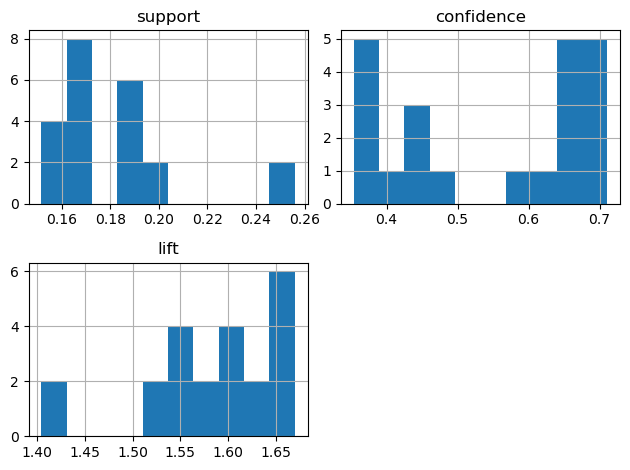

In [19]:
#Distribution of data
model2[['support', 'confidence', 'lift']].hist()
plt.tight_layout()

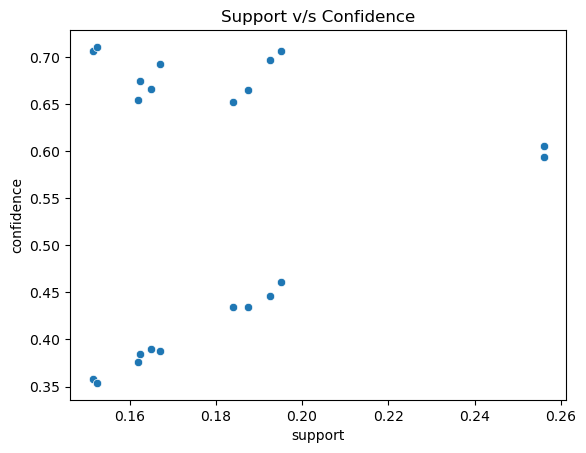

In [20]:
#Relationship between support and confidence
sns.scatterplot(model2['support'], model2['confidence']);
plt.title("Support v/s Confidence");

###### Rules with min_support >= 0.2

In [21]:
#Rules
score3 = apriori(books, min_support=0.2, use_colnames=True)
score3['Length'] = score3['itemsets'].apply(lambda x : len(x))
score3

,support,itemsets,Length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.2560,"(ChildBks, CookBks)",2


In [22]:
model3 = association_rules(score3, metric='lift')
model3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


## =======================================================================